<a href="https://colab.research.google.com/github/segnig/Financial-Inclusion-in-Africa/blob/main/eda_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
FILE_PATH = "/content/drive/MyDrive/Data Science/financial-inclusion-in-africa/"

TRAIN_PATH = "Train.csv"
TEST_PATH = "Test.csv"

VARIABLE_DEFINITIONS_PATH = "VariableDefinitions.csv"
SAMPLE_SUBMISSION_PATH = "SampleSubmission.csv"


## Libraries Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset to DataFrame

In [4]:
train = pd.read_csv(FILE_PATH + TRAIN_PATH)
test = pd.read_csv(FILE_PATH + TEST_PATH)

variable_definitions = pd.read_csv(FILE_PATH + VARIABLE_DEFINITIONS_PATH)
sample_submission = pd.read_csv(FILE_PATH + SAMPLE_SUBMISSION_PATH)

# Train DataSet

In [5]:
# How many features and their data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# Data wrangling Function

In [11]:
def wrangle(df):
    df_copy = df.copy()


    # dropped features
    dropped_feature = ["year"]



    return df_copy


## Banking the Unbanked: How Country Shapes Financial Access in Africa?

In [9]:
# How much data is form each country?
train['country'].value_counts(normalize=True).round(2)

,proportion
country,
Rwanda,0.37
Tanzania,0.28
Kenya,0.26
Uganda,0.09


The dataset predominantly represents four East African countries, with the largest proportion of data `37%` originating from `Rwanda`. `Tanzania` contributes `28%` of the data, followed closely by `Kenya` with `26%`. `Uganda` accounts for the remaining `9%`. This distribution highlights a strong focus on Rwanda while ensuring significant representation from other key East African nations, providing a comprehensive regional perspective on financial inclusion trend

In [10]:
train[train["bank_account"] == "Yes"]["country"].value_counts(normalize=True)

,proportion
country,
Kenya,0.459239
Rwanda,0.302838
Tanzania,0.183273
Uganda,0.054650


In [12]:
train[train["bank_account"] == "No"]["country"].value_counts(normalize=True)

,proportion
country,
Rwanda,0.382545
Tanzania,0.297497
Kenya,0.224965
Uganda,0.094993


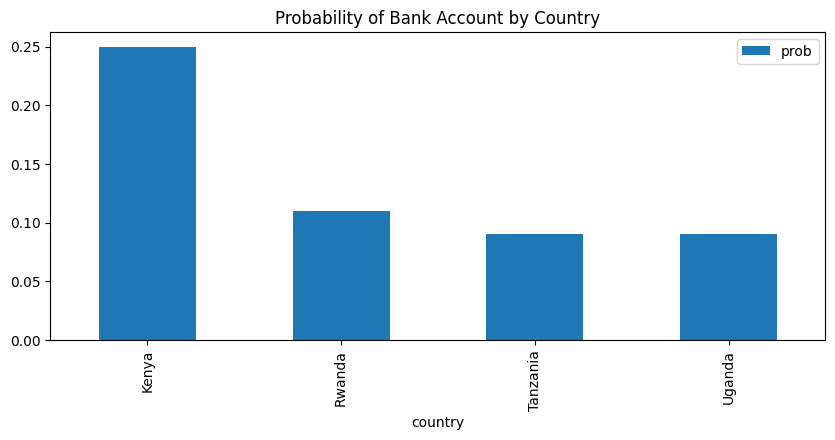

In [24]:
# The probability across the countries have bank_account
prob_country_bank_account = train.groupby("country")["bank_account"].value_counts(normalize=True).round(2)

prob_country_bank_account = prob_country_bank_account.reset_index(name="prob").set_index("country")

prob_country_bank_account[prob_country_bank_account["bank_account"] == "Yes"].plot(kind="bar", title="Probability of Bank Account by Country", figsize=(10, 4));

In [25]:
train["year"].unique()

array([2018, 2016, 2017])

# Unlocking Financial Inclusion: Exploring the Impact of Year and Country on Bank Account Ownership

In [27]:
train.groupby("year")[["bank_account", "country"]].value_counts(normalize=True).round(2)


year  bank_account  country 
2016  No            Rwanda      0.89
      Yes           Rwanda      0.11
2017  No            Tanzania    0.91
      Yes           Tanzania    0.09
2018  No            Kenya       0.56
                    Uganda      0.24
      Yes           Kenya       0.19
                    Uganda      0.02
Name: proportion, dtype: float64

## Tracking Financial Access: How Year and Country Shape Bank Account Ownership Trends

| Year | Bank Account | Country  | Proportion |
|------|--------------|----------|------------|
| 2016 | No           | Rwanda   | 0.89       |
| 2016 | Yes          | Rwanda   | 0.11       |
| 2017 | No           | Tanzania | 0.91       |
| 2017 | Yes          | Tanzania | 0.09       |
| 2018 | No           | Kenya    | 0.56       |
| 2018 | No           | Uganda   | 0.24       |
| 2018 | Yes          | Kenya    | 0.19       |
| 2018 | Yes          | Uganda   | 0.02       |

Year feature does not have relation with out target vector.